In [24]:
# importing numpy and matplotlib

import numpy as np
from matplotlib import pyplot as plt

#printing graphs inline
%matplotlib inline


In [25]:
# Step -1 Define out data
# input values X - value, Y- value  and Bias Term
X = np.array([[-2,4,-1],[4,1, -1], [1,6, -1],[2, 4, -1], [6 , 2, -1]])

# output labels
Y = np.array([-1, -1, 1,1,1])

-2 4
4 1
1 6
2 4
6 2


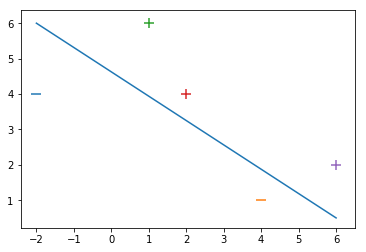

In [26]:
# Plotting the data

for d, sample in enumerate(X):
    # plotting negative samples with '_' by converting x to enumuaration
    
    if d < 2:
        print(sample[0], sample[1])
        plt.scatter(sample[0], sample[1], s = 120, marker='_', linewidths = 2)
    else:
        print(sample[0], sample[1])
        plt.scatter(sample[0], sample[1],s= 120, marker='+', linewidths = 2 )
        
#manually plotting a hyperplane by giving values (naive guess or child guess)
plt.plot([-2,6],[6,0.5])

In [27]:
# Loss function : What to minimize
# Objective function: What to optimize ( In this case weights)
# Hinge loss 
#     c(x, y, f(x)) = (1-y*f(x))+
#
#
#     c(x, y, f(x)) =  0 --> y*f(x) >= 1
#                   =  1 - y*f(x)  for other values
#
#     objective function = Regulizer + sum of loss
#     regulizer = lambda * (Weights)^2
#     lamdba = (1/ epochs)
#     This will make the regulizer to make adjustments minimal as we are approching to global minima
#     
# To optimize the objective function we have to use derivates to find their rate of change 
# derivative of regulaizer  d/d(w) (lamdba * (w)^ 2) = 2* lamdba * W
# derivaive of loss function d/d(w) (1 - y(x*w)) = 0 -- if y*f(x) >= 1 
#                                               = - y*x -- inother case                          
#
# update rule to update weights
#  updated weight = present weight +  learning_rate * (derivative of regulizer + derivative of weights)
#  
#  when y*f(x) < 1
#  w = w + learning_rate(y*x - 2* lamdba * weights)
#   
#  when y*f(x) >= 1 
#  w = w + learning_rate(-2 * lambda * weights)
#                                         


In [28]:
def svm_sgd_plot(X, Y):
    # Initialize the weights to zerp
    w = np.zeros (len(X[0]))
    # The learning rate 
    eta = 1
    # logging errors 
    errors = []
    
    # number of epochs
    epochs = 100000
    for epoch in range(1,100000):
        #setting error to zero
        error = 0
        # iterating throught the dataset
        for i, x in enumerate(X):
            if ((Y[i] * np.dot(X[i],w)) < 1):
                w = w + eta *(Y[i]*X[i] - (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + eta *(-2 * (1/epoch) * w)
        errors.append(error)
        
    #plotting the rate of errors we are getting as we are moving throught the epochs

    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
     
    # Returning updated weights     
    return w

-2 4
4 1
1 6
2 4
6 2


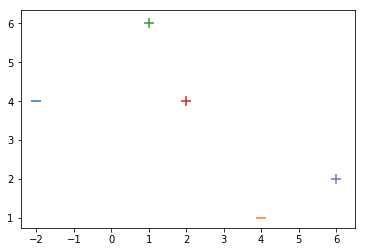

In [29]:
# Testing the svm
for d, sample in enumerate(X):
    # plotting negative samples with '_' by converting x to enumuaration
    
    if d < 2:
        print(sample[0], sample[1])
        plt.scatter(sample[0], sample[1], s = 120, marker='_', linewidths = 2)
    else:
        print(sample[0], sample[1])
        plt.scatter(sample[0], sample[1],s= 120, marker='+', linewidths = 2 )
        
    


C:\Users\Bharath\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


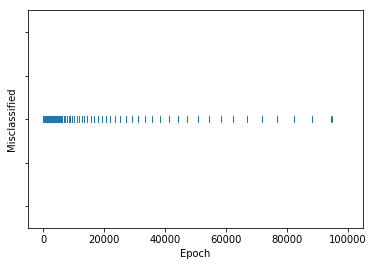

In [30]:
w = svm_sgd_plot(X,Y)

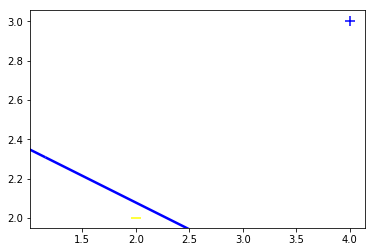

In [31]:
# Add our test samples
plt.scatter(2,2, s = 120, marker = '_', linewidths = 2 , color='yellow')
plt.scatter(4,3, s = 120, marker = '+', linewidths = 2, color = 'blue')

# printing the hyperplane 
#plotting the trained hyper plane

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V, scale=1, color = 'blue')